# Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Dataset 1

In [2]:
#Reading the dataset

df = pd.read_csv('https://raw.githubusercontent.com/amankharwal/Website-data/master/Thecleverprogrammer.csv')
print(df.head())

         Date  Views
0  01/06/2021   7831
1  02/06/2021   7798
2  03/06/2021   7401
3  04/06/2021   7054
4  05/06/2021   7973


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 391 entries, 0 to 390
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    391 non-null    object
 1   Views   391 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 6.2+ KB


In [4]:
#Convert the date column into datetime data type
df["Date"] = pd.to_datetime(df["Date"],format="%d/%m/%Y")
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 391 entries, 0 to 390
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    391 non-null    datetime64[ns]
 1   Views   391 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 6.2 KB
None


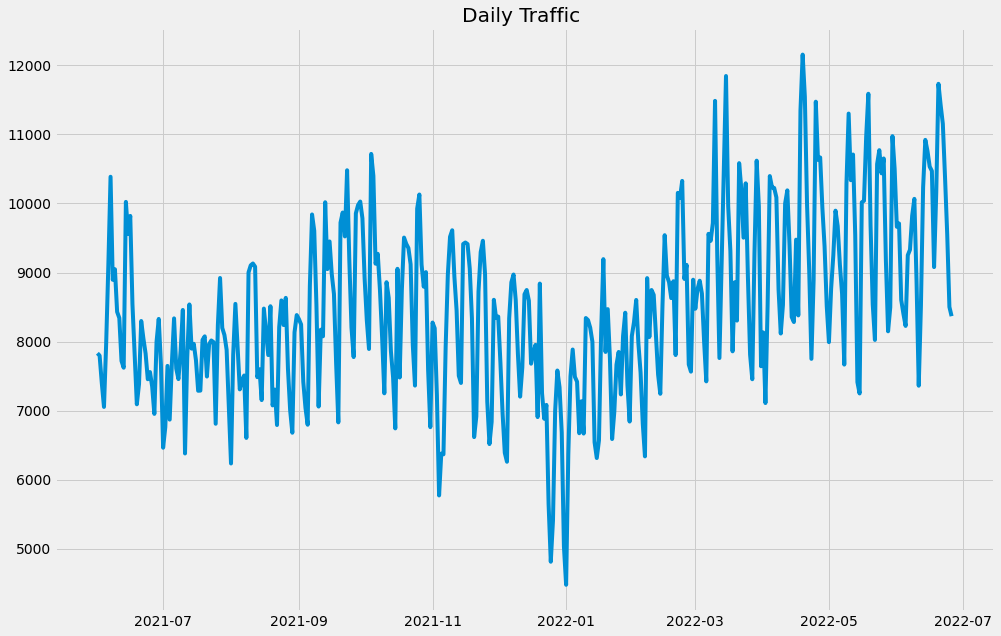

In [5]:
#Plotting the daily traffic 
plt.style.use('fivethirtyeight')
plt.figure(figsize=(15,10))
plt.plot(df["Date"], df["Views"])
plt.title("Daily Traffic ")
plt.show()

<Figure size 432x288 with 0 Axes>

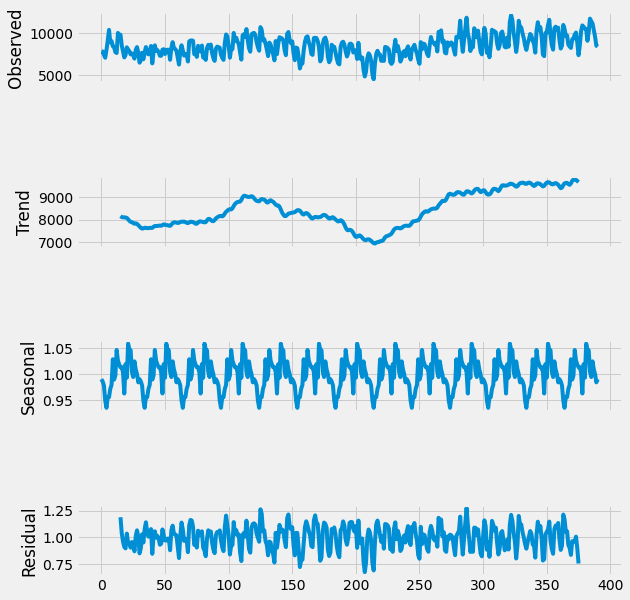

In [20]:
#Find whether the data is stationary or seasonal

result = seasonal_decompose(df["Views"],model='multiplicative',freq=30)
fig = plt.figure()
fig = result.plot()
fig.set_size_inches(10,10)

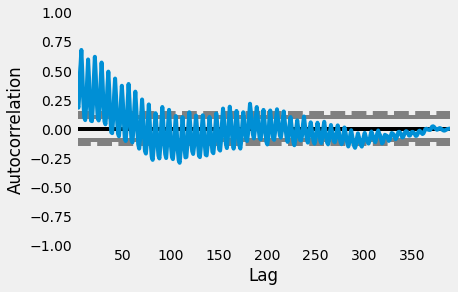

In [7]:
#Using the seasonal ARIMA to forecase traffic

#d = 1 since the data is not stationary
#p = 5
#q = 2

pd.plotting.autocorrelation_plot(df["Views"])

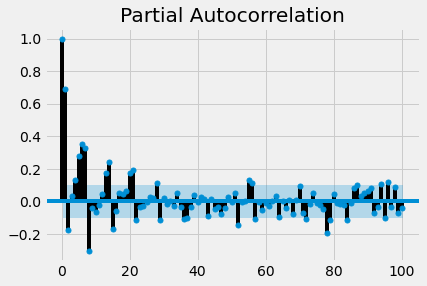

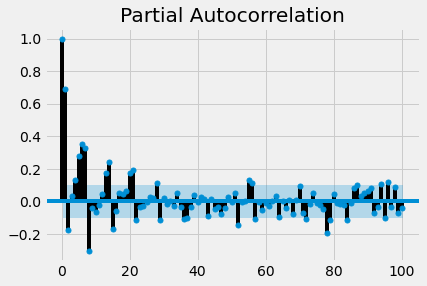

In [8]:
plot_pacf(df['Views'],lags=100)

In [9]:
#Train the SARIMA model

p,d,q = 5,1,2
model = sm.tsa.statespace.SARIMAX(df.Views,order=(p,d,q),seasonal_order=(p,d,q,12))
model = model.fit()
print(model.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


KeyboardInterrupt: ignored

In [ ]:
predictions = model.predict(len(df),len(df)+50)
print(predictions)

In [ ]:
df["Views"].plot(legend=True, label="Training", figsize=(15,10))
predictions.plot(legend=True, label="Prediction")

# Dataset 2

In [10]:
data = pd.read_csv('https://github.com/prathyuma-08/OnboardingAppUI/files/9331501/website-traffic.csv')
print(data.head())

   DayOfWeek MonthDay  Year  Visits
0     Monday   June 1  2009      27
1    Tuesday   June 2  2009      31
2  Wednesday   June 3  2009      38
3   Thursday   June 4  2009      38
4     Friday   June 5  2009      31


In [11]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   DayOfWeek  214 non-null    object
 1   MonthDay   214 non-null    object
 2   Year       214 non-null    int64 
 3   Visits     214 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 6.8+ KB
None


In [12]:
data[['x','Month','Day']] = data['MonthDay'].str.split(' ',expand=True)
data

,DayOfWeek,MonthDay,Year,Visits,x,Month,Day
0,Monday,June 1,2009,27,,June,1
1,Tuesday,June 2,2009,31,,June,2
2,Wednesday,June 3,2009,38,,June,3
3,Thursday,June 4,2009,38,,June,4
4,Friday,June 5,2009,31,,June,5
...,...,...,...,...,...,...,...
209,Sunday,December 27,2009,15,,December,27
210,Monday,December 28,2009,24,,December,28
211,Tuesday,December 29,2009,18,,December,29
212,Wednesday,December 30,2009,10,,December,30


In [13]:
data = data.drop(['DayOfWeek','MonthDay','x'],axis=1)

In [14]:
def tonum(s):
    switcher = {
        "June": 6,
        "July": 7,
        "August": 8,
        "September": 9,
        "October": 10,
        "November": 11,
        "December": 12
    }
    return switcher.get(s, "invalid")

In [15]:
data['Month'] = data['Month'].apply(lambda x: tonum(x))

In [16]:
data['Date'] = data['Day'].astype(str) + "/" + data["Month"].astype(str) + "/" + data["Year"].astype(str)

In [17]:
data["Date"] = pd.to_datetime(data["Date"],format="%d/%m/%Y")
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Year    214 non-null    int64         
 1   Visits  214 non-null    int64         
 2   Month   214 non-null    int64         
 3   Day     214 non-null    object        
 4   Date    214 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 8.5+ KB
None


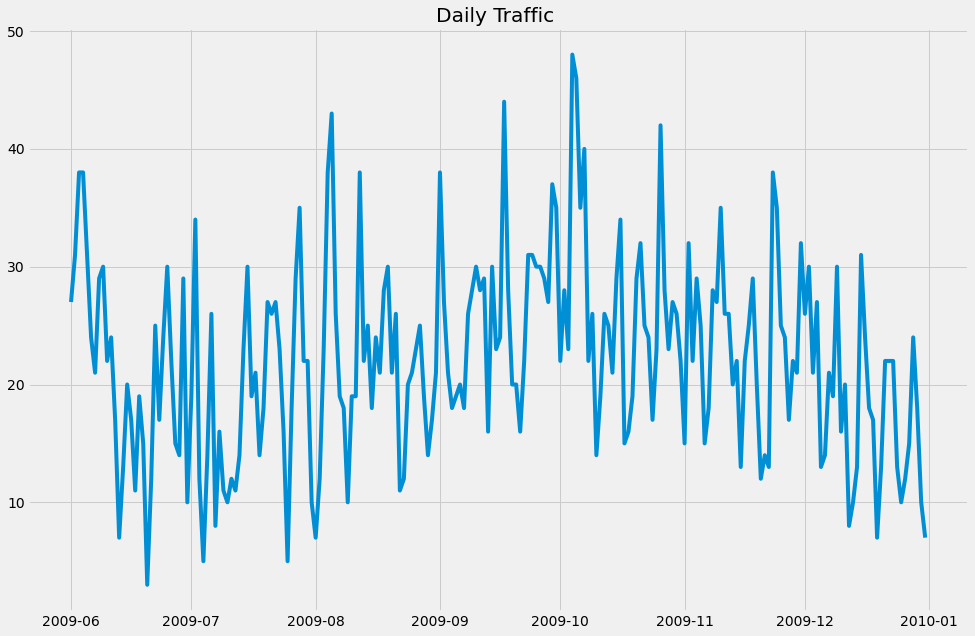

In [19]:
#Plotting the daily traffic 
plt.style.use('fivethirtyeight')
plt.figure(figsize=(15,10))
plt.plot(data["Date"], data["Visits"])
plt.title("Daily Traffic ")
plt.show()

<Figure size 432x288 with 0 Axes>

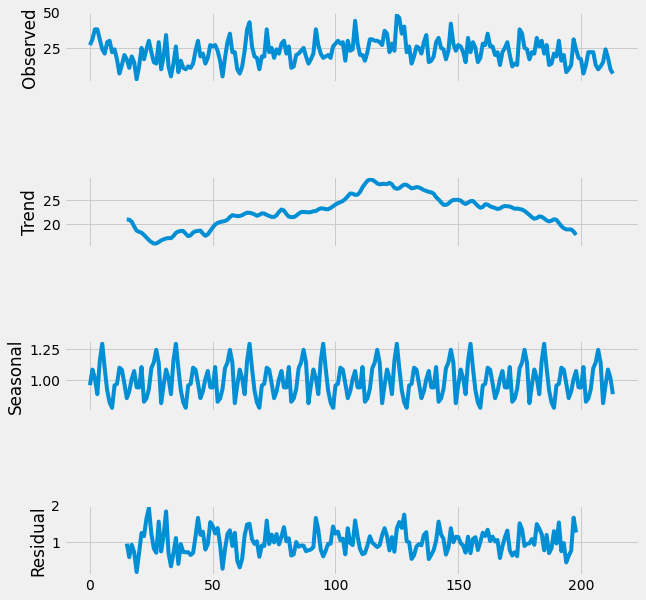

In [24]:
#Find whether the data is stationary or seasonal

result = seasonal_decompose(data["Visits"],model='multiplicative',freq=30)
fig = plt.figure()
fig = result.plot()
fig.set_size_inches(10,10)

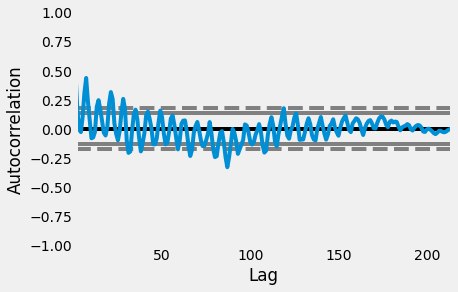

In [25]:
pd.plotting.autocorrelation_plot(data["Visits"])

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


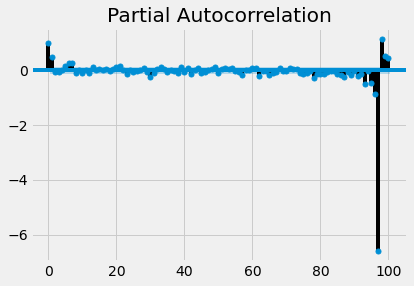

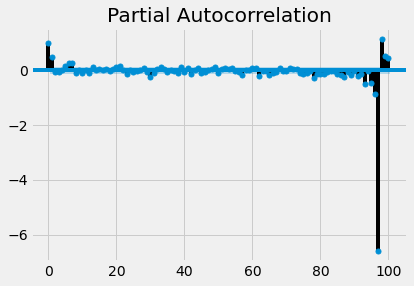

In [26]:
plot_pacf(data['Visits'],lags=100)

In [ ]:
#Train the SARIMA model

#p,d,q = 5,1,2
model = sm.tsa.statespace.SARIMAX(df.Views,order=(p,d,q),seasonal_order=(p,d,q,12))
model = model.fit()
print(model.summary())